In [1]:
import pandas as pd
import numpy as np

In [2]:
harData = pd.read_csv("a_data.csv")

In [3]:
len(harData)

49159

In [4]:
harData.head()

,Date,Time,Resistor,RC,RR,VT,V,DTCY,Target
0,10/31/2018,13:46:39:650,44.82758,0,13,1.786316,23.22211,33,Standing
1,10/31/2018,13:46:39:696,44.82758,0,13,1.786316,23.22211,33,Standing
2,10/31/2018,13:46:39:740,44.82758,0,13,1.786316,23.22211,33,Standing
3,10/31/2018,13:46:39:800,44.82758,0,13,1.786316,23.22211,33,Standing
4,10/31/2018,13:46:39:845,44.82758,0,13,1.786316,23.22211,33,Standing


In [5]:
#harData.T
print(harData.Target.value_counts())

Standing    11990
Sitting     11990
Reading     10791
Walking      9592
Hopping      4796
Name: Target, dtype: int64


In [50]:
#harData.columns

In [51]:
# Standing, Sitting, Walking, Reading, Hopping
temp = []
for i in harData.Target:
    if i == "Standing": temp.append(0)
    if i == "Sitting": temp.append(1)
    if i == "Walking": temp.append(2)
    if i == "Reading": temp.append(3)
    if i == "Hopping": temp.append(4)
harData["n_Activity"] = temp

In [52]:
harData.drop(["Date", "Time", "Target"] , axis = 1 , inplace = True)

In [53]:
harData.head()

,Resistor,RC,RR,VT,V,DTCY,n_Activity
0,44.82758,0,13,1.786316,23.22211,33,0
1,44.82758,0,13,1.786316,23.22211,33,0
2,44.82758,0,13,1.786316,23.22211,33,0
3,44.82758,0,13,1.786316,23.22211,33,0
4,44.82758,0,13,1.786316,23.22211,33,0


In [54]:
x = harData.iloc[:, 0:6].values
y = harData.iloc[:, 6].values

In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_1 = LabelEncoder()
y = labelencoder_y_1.fit_transform(y)

In [56]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.25, random_state=101)

In [57]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainX = sc.fit_transform(trainX)
testX = sc.fit_transform(testX)

In [58]:
print(trainX.shape , trainY.shape)
print(testX.shape , testY.shape)

(36869, 6) (36869,)
(12290, 6) (12290,)


In [59]:
# Part two - Time for the ANN
# import the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam
from keras import regularizers

In [60]:
#Taking necessary callbacks of checkpointing and learning rate reducer.
filepath="HAR_weights.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [61]:
# Initialize the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(64, input_dim=trainX.shape[1], activation='relu', kernel_regularizer=regularizers.l1_l2(0.001)))
# model.add(Dense(64, input_dim=trainX.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.01, decay=0.01/50),loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [62]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_16 (Dense)             (None, 196)               25284     
_________________________________________________________________
dense_17 (Dense)             (None, 32)                6304      
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 198       
Total para

In [63]:
history = model.fit(trainX, trainY , epochs=50 , batch_size=256 , validation_data=(testX, testY) , callbacks=[checkpoint,lr_reduce])

Train on 36869 samples, validate on 12290 samples
Epoch 1/50
36864/36869 [============================>.] - ETA: 0s - loss: 0.8010 - acc: 0.6470
Epoch 00001: val_acc improved from -inf to 0.71912, saving model to HAR_weights.hdf5
36869/36869 [==============================] - 4s 99us/step - loss: 0.8010 - acc: 0.6470 - val_loss: 0.7028 - val_acc: 0.7191
Epoch 2/50
36864/36869 [============================>.] - ETA: 0s - loss: 0.6138 - acc: 0.7130
Epoch 00002: val_acc did not improve
36869/36869 [==============================] - 1s 37us/step - loss: 0.6138 - acc: 0.7130 - val_loss: 0.7595 - val_acc: 0.6760
Epoch 3/50
35584/36869 [===========================>..] - ETA: 0s - loss: 0.6094 - acc: 0.7375
Epoch 00003: val_acc improved from 0.71912 to 0.72205, saving model to HAR_weights.hdf5
36869/36869 [==============================] - 1s 40us/step - loss: 0.6073 - acc: 0.7380 - val_loss: 0.6574 - val_acc: 0.7221
Epoch 4/50
36864/36869 [============================>.] - ETA: 0s - loss: 0.7

36869/36869 [==============================] - 1s 36us/step - loss: 0.1908 - acc: 0.9190 - val_loss: 0.1817 - val_acc: 0.9254
Epoch 29/50
35840/36869 [============================>.] - ETA: 0s - loss: 0.1924 - acc: 0.9195
Epoch 00029: val_acc improved from 0.92539 to 0.92766, saving model to HAR_weights.hdf5
36869/36869 [==============================] - 1s 39us/step - loss: 0.1923 - acc: 0.9194 - val_loss: 0.1804 - val_acc: 0.9277
Epoch 30/50
36352/36869 [============================>.] - ETA: 0s - loss: 0.1904 - acc: 0.9208
Epoch 00030: val_acc improved from 0.92766 to 0.92856, saving model to HAR_weights.hdf5
36869/36869 [==============================] - 1s 40us/step - loss: 0.1908 - acc: 0.9208 - val_loss: 0.1764 - val_acc: 0.9286
Epoch 31/50
36352/36869 [============================>.] - ETA: 0s - loss: 0.2099 - acc: 0.9145
Epoch 00031: val_acc improved from 0.92856 to 0.93068, saving model to HAR_weights.hdf5
36869/36869 [==============================] - 2s 42us/step - loss: 0.

In [64]:
# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

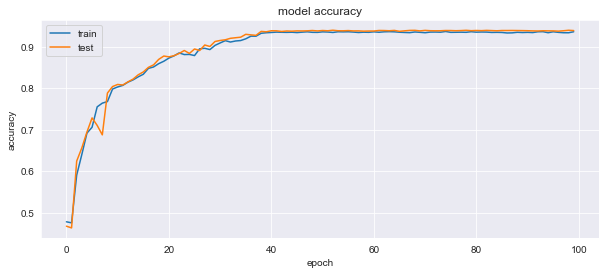

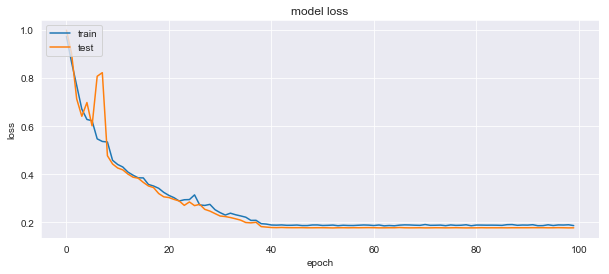

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
# Evaluate the network
print("[INFO] evaluating network...")
from sklearn.metrics import classification_report , accuracy_score
from sklearn.metrics import confusion_matrix
model.load_weights("HAR_weights.hdf5")
y_pred = model.predict(testX)
y_pred = np.argmax(y_pred, axis=1) 

cm = confusion_matrix(testY, y_pred)
print(cm)

[INFO] evaluating network...
[[2822  159   37    0    3]
 [  81 2867   17    0    0]
 [ 146   83 2090    0   87]
 [   0    0    0 2696    0]
 [  22    6  103    0 1071]]


In [44]:
print(classification_report(testY, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.93      0.93      3021
          1       0.92      0.97      0.94      2965
          2       0.93      0.87      0.90      2406
          3       1.00      1.00      1.00      2696
          4       0.92      0.89      0.91      1202

avg / total       0.94      0.94      0.94     12290



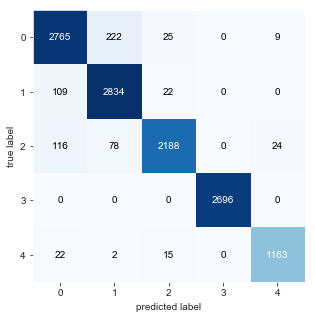

In [221]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(10, 5))
plt.show()

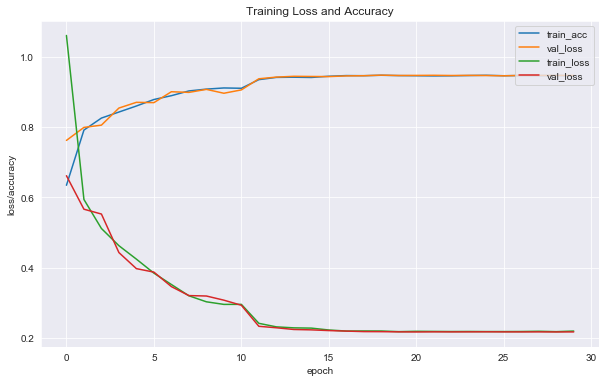

In [222]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
plt.plot(history.history['acc'], label="train_acc")
plt.plot(history.history['val_acc'], label="val_loss")
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title('Training Loss and Accuracy')
plt.ylabel('loss/accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()